# Lead Company-Sector Mapping

 - Data Exploration and Preprocessing Script

In [1]:
# !pip install fasttext

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px

import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop = stopwords.words('english')
import fasttext
import fasttext.util
ft = fasttext.load_model('../../clustering_func_div/cc.en.300.bin')

In [3]:
# reading data
data = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
# show top 5 entries by default
data.head()

,revenue,rank,stock_exchange,open_requisitions_range,stock_price,stock_symbol,_id,company_city,company_country,company_state,...,flag,nubela_id,linkedin_internal_id,tagline,linkedin_search_id,linkedin_employee_count,linkedin_follower_count,addr_upd_from,owler_id,partition_0
0,NaN,525172.0,NaN,NaN,NaN,NaN,5b073192599b311ccc11b101,San Francisco,United States,California,...,NaN,proleads-io,2936369.0,NaN,2936369,2.0,97.0,NaN,NaN,2021-07-21
1,NaN,988083.0,NaN,NaN,NaN,NaN,5b0737d1599b311ccc11c3f4,Madrid,Spain,Madrid,...,NaN,cramway,3075546.0,NaN,3075546,1.0,84.0,NaN,NaN,2021-07-21
2,NaN,383864.0,NaN,NaN,NaN,NaN,5b073905599b311ccc11c792,Sion,Switzerland,Valais,...,NaN,imperix,3328031.0,Imperix develops high-end control prototyping ...,3328031,9.0,1174.0,NaN,NaN,2021-07-21
3,NaN,148922.0,NaN,NaN,NaN,NaN,5b073d93599b311ccc11d524,Seoul,Korea Republic of,Seoul-t'ukpyolsi,...,NaN,yonhap-infomax,519567.0,NaN,519567,72.0,NaN,NaN,NaN,2021-07-21
4,NaN,247881.0,NaN,NaN,NaN,NaN,5b07485b599b311ccc11f4af,New York,United States,New York,...,NaN,saffron-fix,52765808.0,NaN,52765808,NaN,NaN,NaN,NaN,2021-07-21


In [5]:
# creating and saving a copy
# original_data = data.copy()

# 1. Variable Identification

Considering it a multiclass-classification problem.
- Target Variable : industry (in this notebook)
- i/p Variable : text column, Categorical, and Numerical

In [6]:
# getting column names for data
print("\n Columns in data- \n\n",data.columns, "\n\n No. of Unique columns - \n", data.columns.nunique())


 Columns in data- 

 Index(['revenue', 'rank', 'stock_exchange', 'open_requisitions_range',
       'stock_price', 'stock_symbol', '_id', 'company_city', 'company_country',
       'company_state', 'company_crunchbase_page', 'company_description',
       'company_facebook_page', 'company_funding', 'company_industry',
       'company_latest_funding_date', 'company_linkedin_page', 'company_name',
       'company_phone_number', 'company_products_services',
       'company_profile_image_url', 'company_sector', 'company_size',
       'company_twitter_page', 'company_type', 'company_website', 'ebitda',
       'fiscal_year', 'homepage_url', 'job_count', 'tags', 'lead_count',
       'updated_at', 'permalink', 'company_founded_at', 'geo_point',
       'company_continent', 'postal_code', 'company_address', 'sic_code',
       'naics_code', 'created_at', 'cb_id', 'revenue_range', 'flag',
       'nubela_id', 'linkedin_internal_id', 'tagline', 'linkedin_search_id',
       'linkedin_employee_count', '

In [7]:
# getting data-types
print("Data Types of the columns are:\n\n", data.dtypes)

Data Types of the columns are:

 revenue                        float64
rank                           float64
stock_exchange                  object
open_requisitions_range         object
stock_price                     object
stock_symbol                    object
_id                             object
company_city                    object
company_country                 object
company_state                   object
company_crunchbase_page         object
company_description             object
company_facebook_page           object
company_funding                float64
company_industry                object
company_latest_funding_date    float64
company_linkedin_page           object
company_name                    object
company_phone_number            object
company_products_services       object
company_profile_image_url       object
company_sector                  object
company_size                    object
company_twitter_page            object
company_type                   

In [8]:
# shape of the dataset
print("Shape of the dataset is :\n", data.shape)

Shape of the dataset is :
 (596769, 54)


# 2. Missing Values

In [9]:
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
print("\n ******* Missing Values in the Data ******* \n\n",missing_Data)


 ******* Missing Values in the Data ******* 

                               Total     Percent
flag                         596769  100.000000
owler_id                     596769  100.000000
stock_price                  596529   99.959783
open_requisitions_range      593794   99.501482
stock_exchange               593189   99.400103
stock_symbol                 593189   99.400103
revenue                      589647   98.806573
ebitda                       589459   98.775070
addr_upd_from                584058   97.870030
fiscal_year                  561886   94.154690
naics_code                   474667   79.539487
sic_code                     474661   79.538481
tags                         419008   70.212762
geo_point                    364239   61.035174
tagline                      331959   55.626046
postal_code                  230507   38.625833
company_products_services    214661   35.970535
company_twitter_page         212575   35.620986
linkedin_follower_count      211450   35

- dropping columns where missing values >40 %

In [11]:
data.drop(["flag", "owler_id", "stock_price","open_requisitions_range","stock_exchange","stock_symbol","revenue","ebitda"
          , "addr_upd_from", "fiscal_year", "naics_code", "sic_code", "tags", "geo_point", "tagline", "postal_code"], axis =1, inplace = True)

In [12]:
data = data[["company_city", "company_country", "company_state", "company_name", "company_products_services", "company_industry",
             "company_size", "company_type", "company_founded_at", "company_continent", "company_address", "revenue_range",
            "rank","_id", "company_funding", "lead_count", "job_count", "cb_id", "linkedin_employee_count", "linkedin_follower_count",
             "company_description", "company_latest_funding_date", "created_at", "company_sector"]]

In [13]:
# shape of the dataset
print("Shape of the dataset is :\n", data.shape)

Shape of the dataset is :
 (596769, 24)


In [14]:
print("****** Columns Available post dropping Columns with High Missing Values and Business Knowledge %   ********\n\n", data.columns)

****** Columns Available post dropping Columns with High Missing Values and Business Knowledge %   ********

 Index(['company_city', 'company_country', 'company_state', 'company_name',
       'company_products_services', 'company_industry', 'company_size',
       'company_type', 'company_founded_at', 'company_continent',
       'company_address', 'revenue_range', 'rank', '_id', 'company_funding',
       'lead_count', 'job_count', 'cb_id', 'linkedin_employee_count',
       'linkedin_follower_count', 'company_description',
       'company_latest_funding_date', 'created_at', 'company_sector'],
      dtype='object')


There are 5.96769 lakh rows and 24 considerable columns in the dataset.

 - Categorical Variables:company_city, company_country, company_state, company_name, company_products_services, company_sector, company_size, company_type, company_founded_at, company_continent, company_address, revenue_range
 
 
 - Continuous Variables:rank,_id, company_funding, lead_count, job_count, cb_id, linkedin_employee_count, linkedin_follower_count
 
 - Text Data: company_description
 
 - Date : company_latest_funding_date, created_at
 
 - Others(like Links, etc):
 
    TARGET VARIABLE : `company_industry`

# 3. Univariate Analysis

### 3.1 Categorical Variables

In [15]:
def get_bar_and_percent(df,column_name,y_label,x_label):
    
    print("\n\n ****** Percentage Wise Variable Distribution ********* \n")
    print(df[column_name].value_counts(normalize=True)*100)   # percentage wise
    if df[column_name].nunique()<70:
        print("\n\n ****** Bar Graph for - "+column_name+" ******\n")
        fig = plt.figure(figsize = (15, 5))
        # creating the bar plot
        df[column_name].value_counts(normalize=False).plot.bar(title = column_name) 
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    else:
        c = df[column_name].nunique()
        print("\n ------------ Number of Unique entries: "+str(c)+"  are too large to display ------------\n")
        print("\n ------------  Single Random Row  ------------\n", df[column_name][0])
    
    return True

In [16]:
# company_city
get_bar_and_percent(data,"company_city","Frequency","Categories in company_city")



 ****** Percentage Wise Variable Distribution ********* 

London               3.565437
New York             3.365380
San Francisco        2.149835
Paris                1.123118
Chicago              1.073017
                       ...   
Casale Sul Sile      0.000173
Locate Di Triulzi    0.000173
Chongming            0.000173
Parana               0.000173
Great Bridgeford     0.000173
Name: company_city, Length: 27545, dtype: float64

 ------------ Number of Unique entries: 27545  are too large to display ------------


 ------------  Single Random Row  ------------
 San Francisco


True

In [17]:
# company_country
get_bar_and_percent(data,"company_country","Frequency","Categories in company_country")



 ****** Percentage Wise Variable Distribution ********* 

United States                     47.845466
United Kingdom                     8.846560
India                              4.968656
Canada                             4.378246
France                             2.945029
                                    ...    
Norfolk Island                     0.000171
Saint Martin                       0.000171
Vanuatu                            0.000171
British Indian Ocean Territory     0.000171
Djibouti                           0.000171
Name: company_country, Length: 208, dtype: float64

 ------------ Number of Unique entries: 208  are too large to display ------------


 ------------  Single Random Row  ------------
 United States


True

In [18]:
# company_state
get_bar_and_percent(data,"company_state","Frequency","Categories in company_state")



 ****** Percentage Wise Variable Distribution ********* 

California          10.820767
New York             5.041409
England              3.551803
Texas                3.240521
Florida              2.723454
                      ...    
Bilecik              0.000174
Songkhla             0.000174
Serravalle           0.000174
Artvin               0.000174
Balearic Islands     0.000174
Name: company_state, Length: 2062, dtype: float64

 ------------ Number of Unique entries: 2062  are too large to display ------------


 ------------  Single Random Row  ------------
 California


True

In [19]:
# company_name
get_bar_and_percent(data,"company_name","Frequency","Categories in company_name")



 ****** Percentage Wise Variable Distribution ********* 

Switch                                          0.001173
Sphere                                          0.001173
Canopy                                          0.001173
Shift                                           0.001173
Emerge                                          0.001173
                                                  ...   
Advance Adapters Inc                            0.000168
Roma Entrepreneurship Development Initiative    0.000168
Professional Travel                             0.000168
Buyers Barricades                               0.000168
Advanced Lumonics | EarthLED.com                0.000168
Name: company_name, Length: 593322, dtype: float64

 ------------ Number of Unique entries: 593322  are too large to display ------------


 ------------  Single Random Row  ------------
 ProLeads io


True

In [20]:
# company_products_services
get_bar_and_percent(data,"company_products_services","Frequency","Categories in company_products_services")



 ****** Percentage Wise Variable Distribution ********* 

[Venture Capital]                                                                                                                                0.028003
[Private Equity]                                                                                                                                 0.026956
[Real Estate]                                                                                                                                    0.020675
[Education]                                                                                                                                      0.015441
[Software Development]                                                                                                                           0.011777
                                                                                                                                                   ...   
[Nonprofits, Onl

True

In [21]:
# company_industry
get_bar_and_percent(data,"company_industry","Frequency","Categories in company_industry")



 ****** Percentage Wise Variable Distribution ********* 

Information Technology and Services    12.337437
Computer Software                       8.136314
Internet                                6.675615
Marketing and Advertising               6.003998
Financial Services                      3.772481
                                         ...    
Tobacco                                 0.012400
Alternative Dispute Resolution          0.011730
Ranching                                0.008881
Judiciary                               0.007541
Legislative Office                      0.003351
Name: company_industry, Length: 147, dtype: float64

 ------------ Number of Unique entries: 147  are too large to display ------------


 ------------  Single Random Row  ------------
 Information Technology and Services


True



 ****** Percentage Wise Variable Distribution ********* 

Technology                     30.443605
Professional Services          29.607604
Retail and CPG                  9.176583
Financial Services              8.891548
Industrials & Chemicals         7.224236
Healthcare and Lifesciences     6.899655
Media and Telecom               5.637022
Energy and Utilities            2.119748
Name: company_sector, dtype: float64


 ****** Bar Graph for - company_sector ******



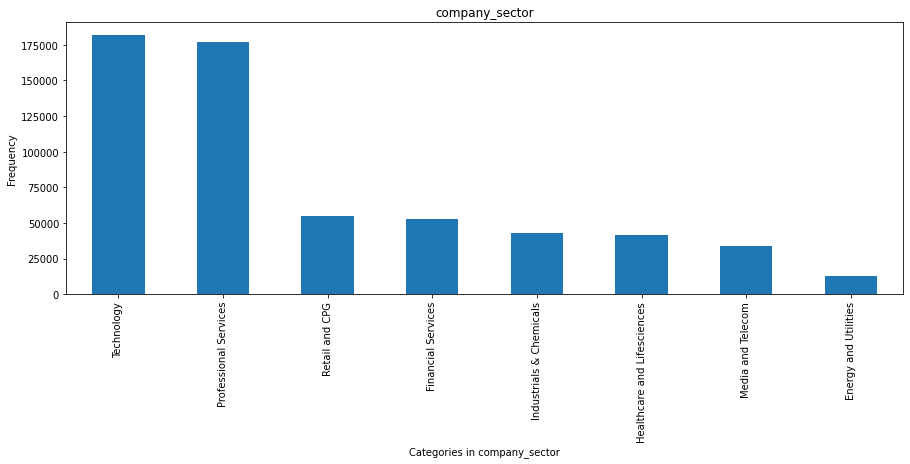

True

In [22]:
# company_sector
get_bar_and_percent(data,"company_sector","Frequency","Categories in company_sector")



 ****** Percentage Wise Variable Distribution ********* 

1-10       35.519463
11-50      33.200937
51-200     16.399877
201-500     6.711046
1k-5k       3.320441
501-1k      3.018599
10k+        1.074684
5k-10k      0.754954
Name: company_size, dtype: float64


 ****** Bar Graph for - company_size ******



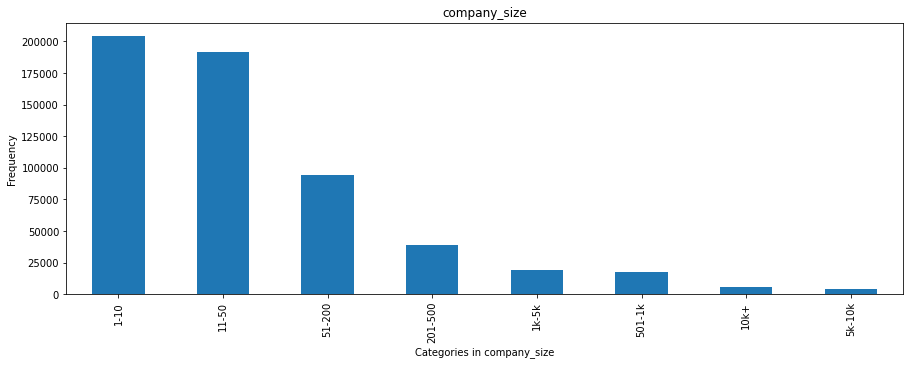

True

In [23]:
# company_size
get_bar_and_percent(data,"company_size","Frequency","Categories in company_size")



 ****** Percentage Wise Variable Distribution ********* 

Private                    70.341714
Public                     12.355012
Partnership                 6.242665
Nonprofit                   4.115946
Sole Proprietorship         4.048596
Educational Institution     1.163887
Self-Employed               1.136787
Government Agency           0.595393
Name: company_type, dtype: float64


 ****** Bar Graph for - company_type ******



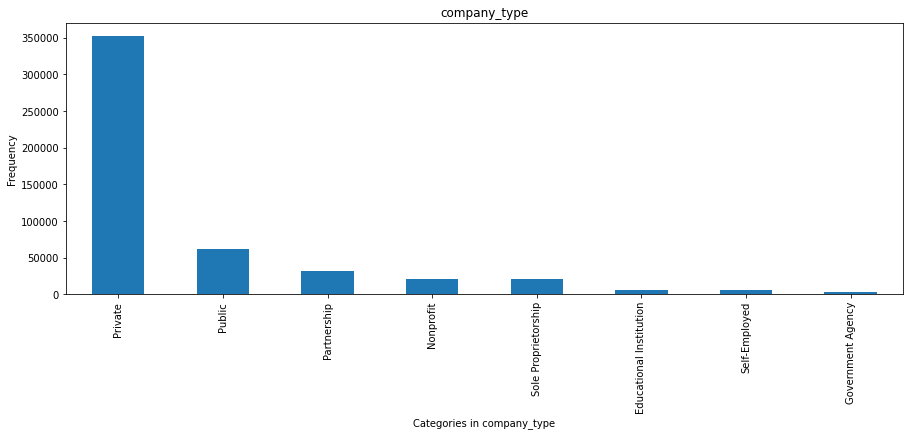

True

In [24]:
# company_type
get_bar_and_percent(data,"company_type","Frequency","Categories in company_type")

In [25]:
# company_founded_at
get_bar_and_percent(data,"company_founded_at","Frequency","Categories in company_founded_at")



 ****** Percentage Wise Variable Distribution ********* 

2015.0    6.493504
2014.0    6.289453
2013.0    5.821408
2012.0    5.584101
2016.0    5.306764
            ...   
1570.0    0.000205
1719.0    0.000205
1563.0    0.000205
1741.0    0.000205
1615.0    0.000205
Name: company_founded_at, Length: 477, dtype: float64

 ------------ Number of Unique entries: 477  are too large to display ------------


 ------------  Single Random Row  ------------
 2012.0


True



 ****** Percentage Wise Variable Distribution ********* 

North America    52.752992
Europe           29.230601
Asia             12.429773
Oceania           2.682016
South America     1.769175
Africa            1.135443
Name: company_continent, dtype: float64


 ****** Bar Graph for - company_continent ******



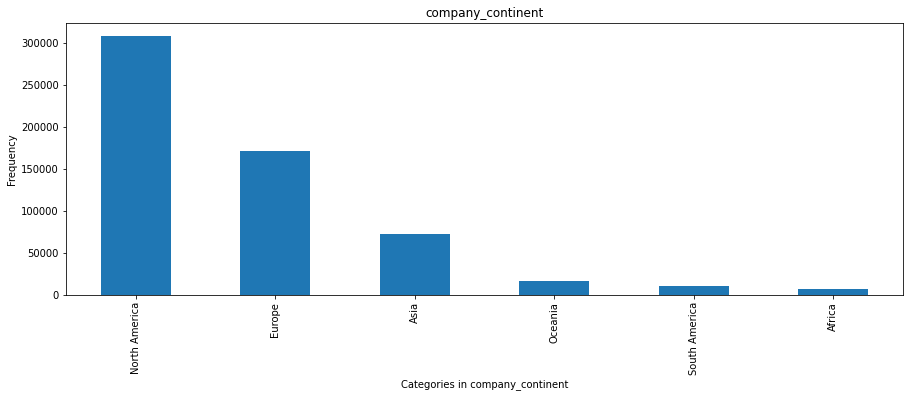

True

In [26]:
# company_continent
get_bar_and_percent(data,"company_continent","Frequency","Categories in company_continent")

In [27]:
# company_address
get_bar_and_percent(data,"company_address","Frequency","Categories in company_address")



 ****** Percentage Wise Variable Distribution ********* 

City And County Of San Francisco                                   0.164858
Los Angeles County                                                 0.102683
Paris                                                              0.051059
Cook County                                                        0.043522
King County                                                        0.038059
                                                                     ...   
144 Woodlands Drive                                                0.000188
2, Esplanade Compans-Caffarelli Bâtiment E - Tour Toulouse 2000    0.000188
8-10 Rue De Mayencin                                               0.000188
560 S. Winchester Boulevard                                        0.000188
Westmarch Business Centre  River Way                               0.000188
Name: company_address, Length: 486983, dtype: float64

 ------------ Number of Unique entries: 486983  a

True



 ****** Percentage Wise Variable Distribution ********* 

Unknown      39.912764
1M-10M       24.537468
<1M          22.294053
10M-50M       8.628799
100M-500M     1.823821
50M-100M      1.593917
1B-10B        0.588000
500M-1B       0.506226
10B+          0.114952
Name: revenue_range, dtype: float64


 ****** Bar Graph for - revenue_range ******



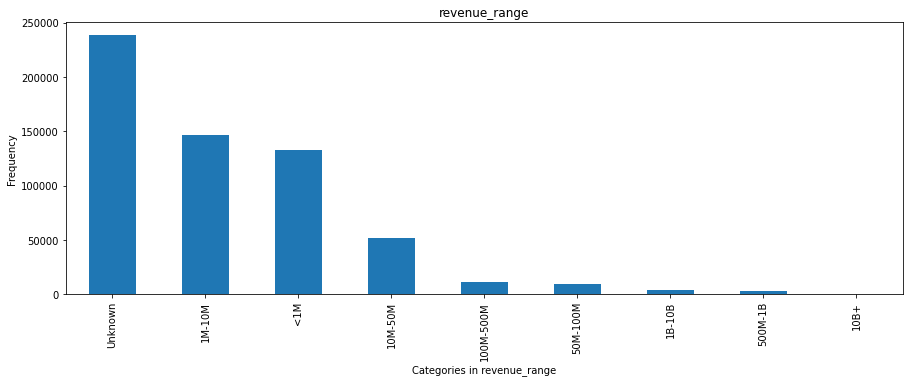

True

In [28]:
# revenue_range
get_bar_and_percent(data,"revenue_range","Frequency","Categories in revenue_range")

### 3.2 Continuous Variables

In [29]:
def get_histogram_boxplot(df, column_name_cont,x_label,y_label,y_label_box):
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(df[column_name_cont]);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.subplot(122)
    df[column_name_cont].plot.box(figsize=(15,4))
#     plt.xlabel(x_label_box)
    plt.ylabel(y_label_box)
    plt.show()

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



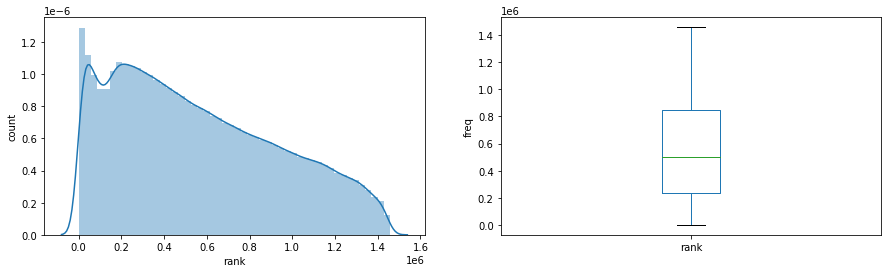

In [30]:
# rank
get_histogram_boxplot(data, "rank","rank","count","freq")

In [31]:
# data["rank_log"] = np.log(data["rank"])
# data.drop(columns=["rank"], inplace = True, axis =1)

In [32]:
# # rank_log
# get_histogram_boxplot(data, "rank_log","rank_log","count","freq")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



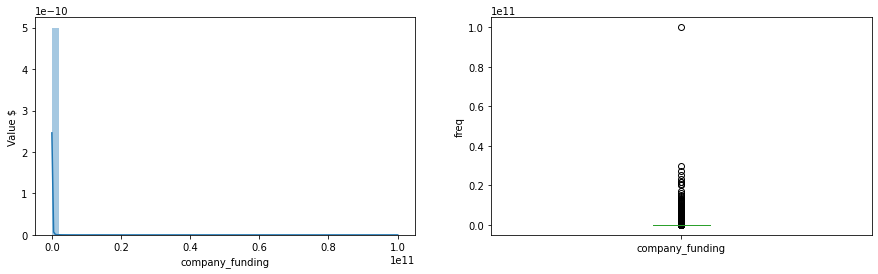

In [33]:
# company_funding
get_histogram_boxplot(data, "company_funding","company_funding","Value $", "freq")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



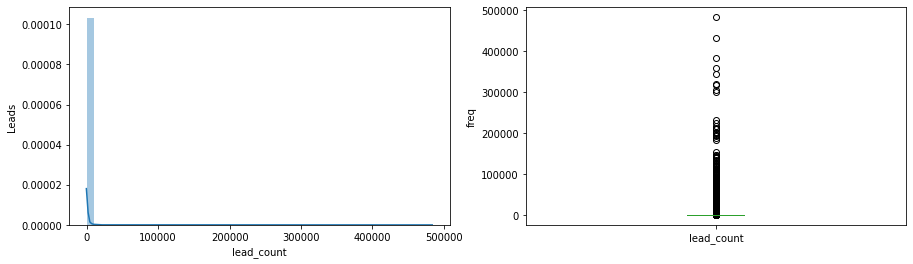

In [34]:
# lead_count
get_histogram_boxplot(data, "lead_count","lead_count","Leads", "freq")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



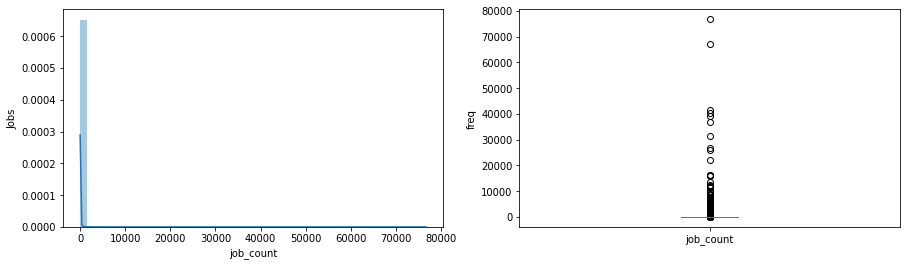

In [35]:
# job_count
get_histogram_boxplot(data, "job_count","job_count","Jobs", "freq")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



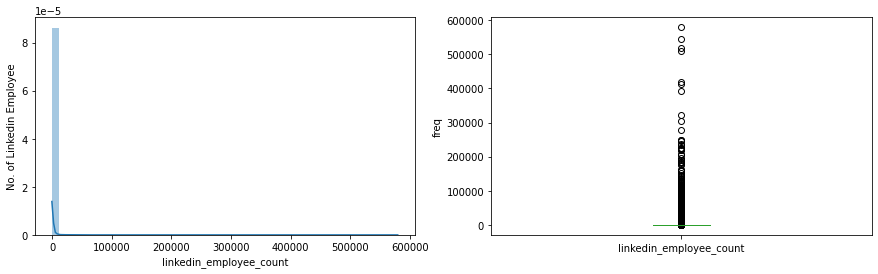

In [36]:
# linkedin_employee_count
get_histogram_boxplot(data, "linkedin_employee_count","linkedin_employee_count","No. of Linkedin Employee", "freq")

There are 5.96769 lakh rows and 24 considerable columns in the dataset.

 - Categorical Variables:company_city, company_country, company_state, company_name, company_products_services, company_industry, company_size, company_type, company_founded_at, company_continent, company_address, revenue_range
 
 
 - Continuous Variables:rank,_id, company_funding, lead_count, job_count, cb_id, linkedin_employee_count, linkedin_follower_count
 
 - Text Data: company_description
 
 - Date : company_latest_funding_date, created_at
 
 - Others(like Links, etc):
 
    TARGET VARIABLE : `company_industry`

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



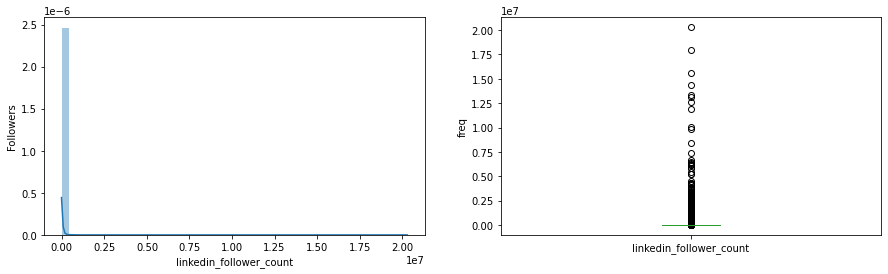

In [37]:
# linkedin_follower_count
get_histogram_boxplot(data, "linkedin_follower_count","linkedin_follower_count","Followers", "freq")

### 3.3 Text Data

In [38]:
print(" Text Type is: \n\n",type(data["company_description"][0]),"\n\n Text: \n",data["company_description"][0])

 Text Type is: 

 <class 'str'> 

 Text: 
 ProLeads is The Holy Grail of Account Based Prospect Development!

We help you aggregate & surface data to optimize your workflow across sales tools and increase conversions with an A.I. driven approach to Account Based Sales.

We provide a set of tools for B2B companies to reduce their customer acquisition cost and increase conversion rates on closing new business. Our mission is to help connect sellers with the right buyers to reach quota with the best customers.


# 4. Bivariate Analysis

Let's have a look of how the categorical variables compares with Target Variable.

In [39]:
def get_cat_cat_graph(df,column1,target_column,x,y):
    if df[column1].nunique()<151:
        
        plt.figure(figsize=(x,y))
        df = pd.crosstab(data[column1],data[target_column])
        df.plot(kind='bar', stacked= True ,grid=True)
#         plt.savefig('foo.png')
        
    else:
        print("Values too big too display")

In [40]:
get_cat_cat_graph(data,"company_city","company_industry",15,10)
# plt.figure(figsize=(10,10))
# df = pd.crosstab(data['Gender'],data['Loan_Status'])
# df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

Values too big too display


In [41]:
get_cat_cat_graph(data,"company_country","company_industry",15,10)

Values too big too display


In [42]:
get_cat_cat_graph(data,"company_state","company_industry",15,10)

Values too big too display


In [43]:
get_cat_cat_graph(data,"company_name","company_industry",15,10)

Values too big too display


In [44]:
get_cat_cat_graph(data,"company_products_services","company_industry",15,10)

Values too big too display


<Figure size 720000x72000 with 0 Axes>

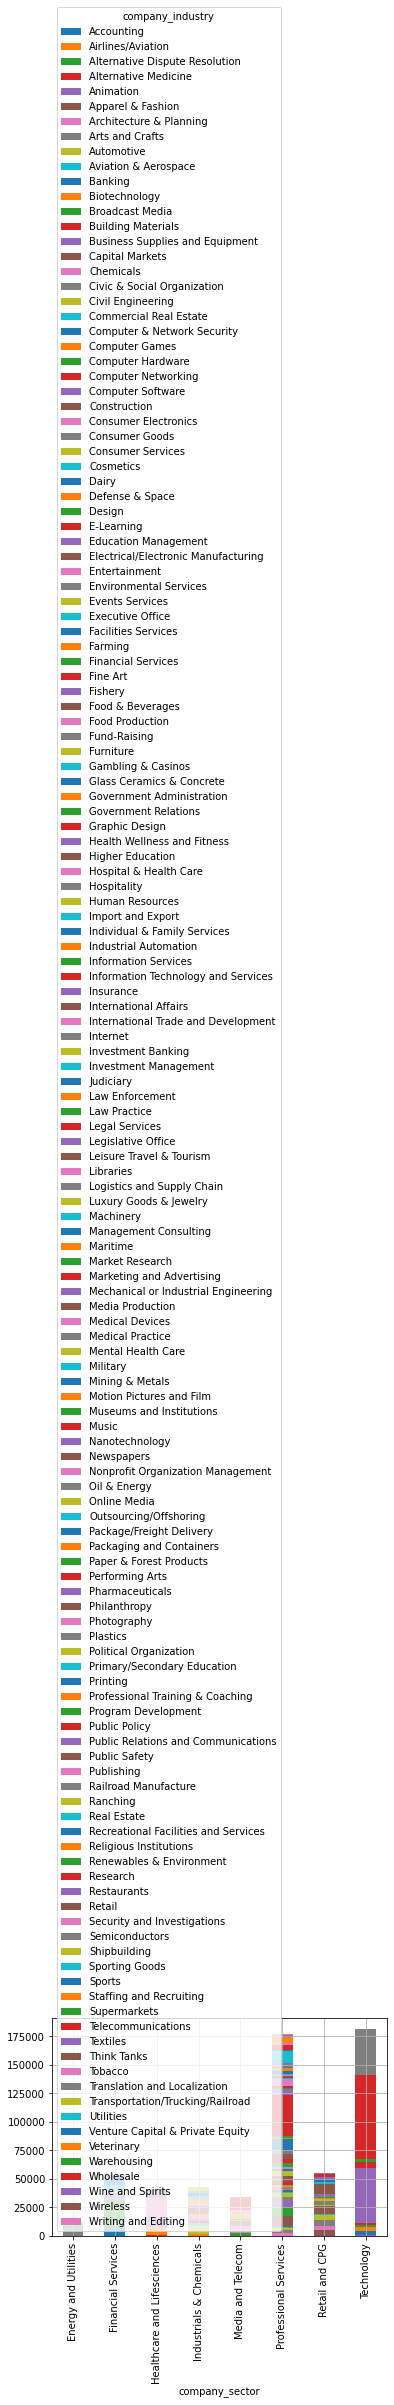

In [45]:
get_cat_cat_graph(data,"company_sector","company_industry",10000,1000)


<Figure size 720x720 with 0 Axes>

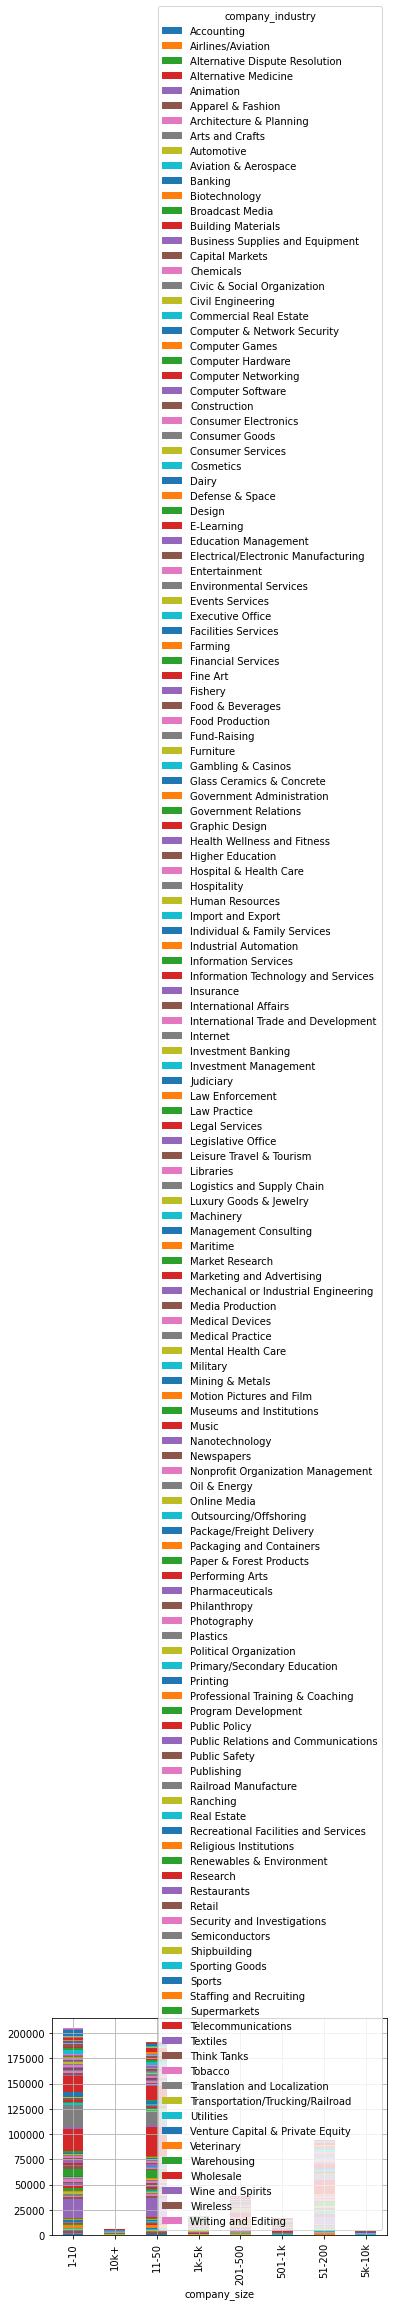

In [46]:
get_cat_cat_graph(data,"company_size","company_industry",10,10)


<Figure size 720x720 with 0 Axes>

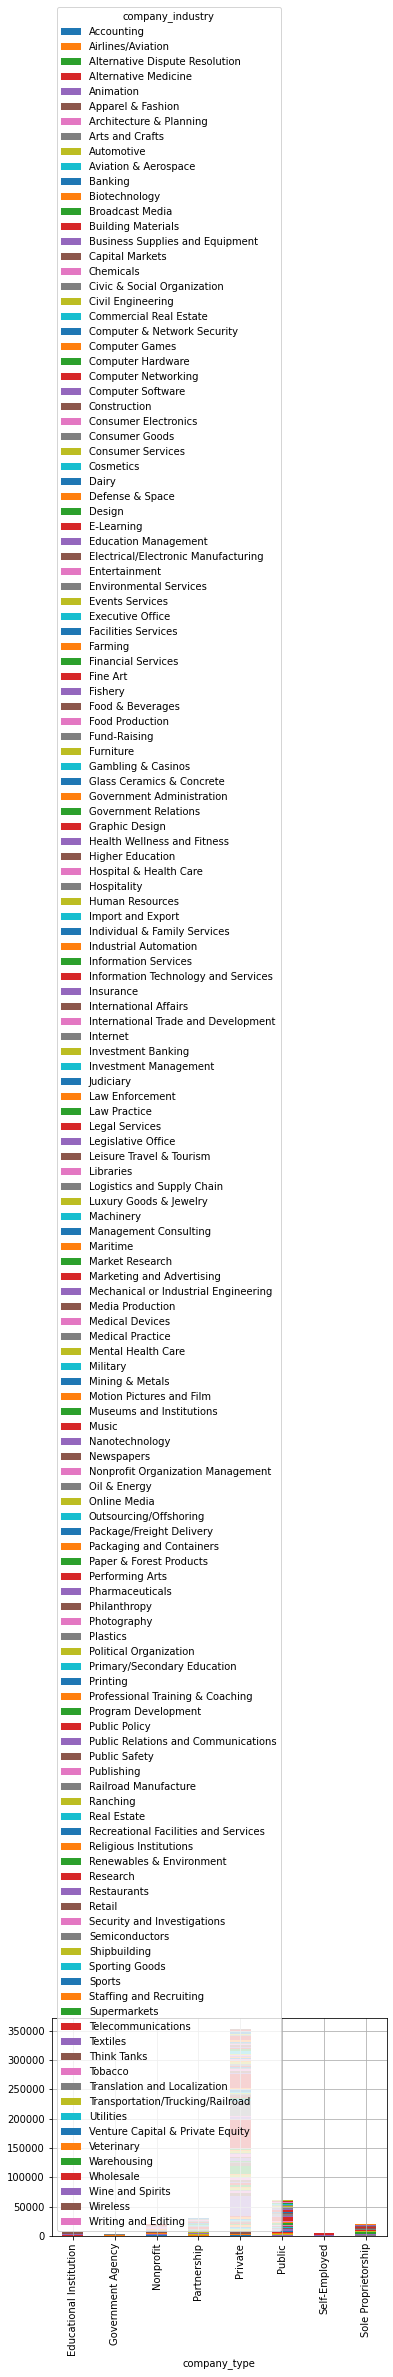

In [47]:
get_cat_cat_graph(data,"company_type","company_industry",10,10)

In [48]:
get_cat_cat_graph(data,"company_founded_at","company_industry",10,10)

Values too big too display


<Figure size 720x720 with 0 Axes>

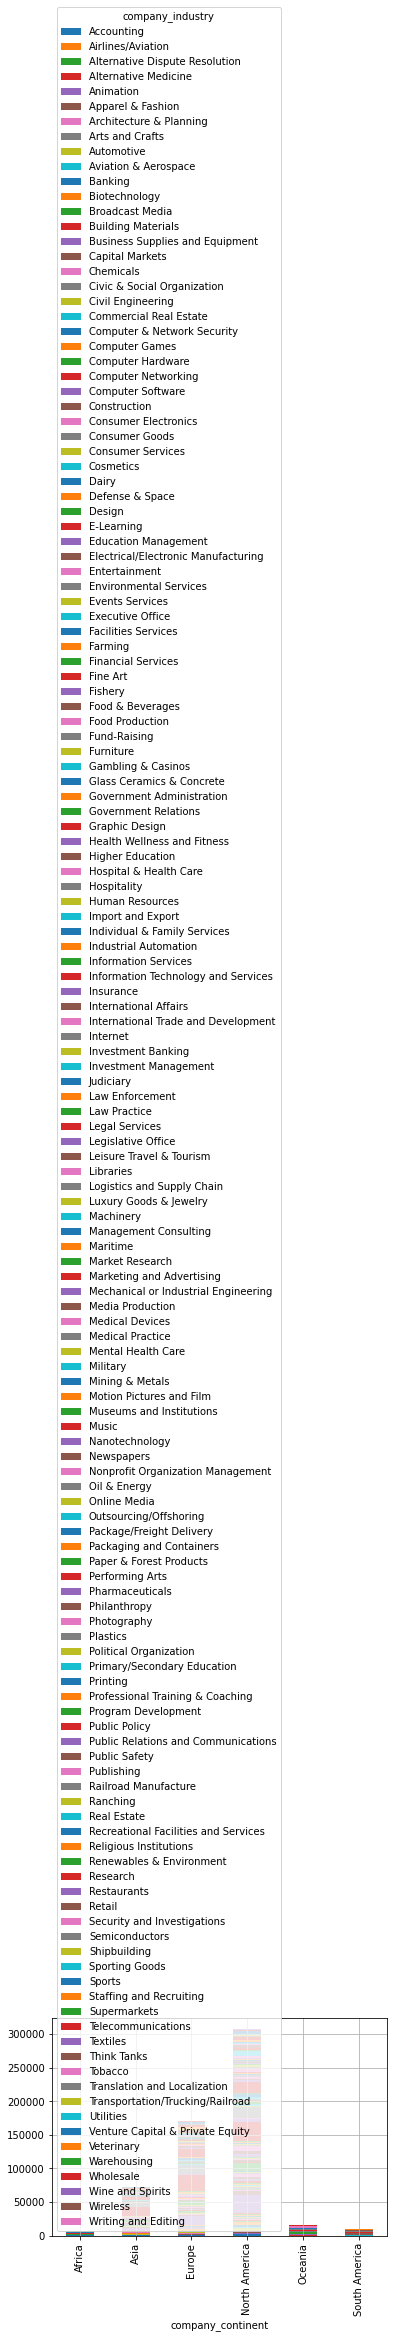

In [49]:
get_cat_cat_graph(data,"company_continent","company_industry",10,10)

In [50]:
get_cat_cat_graph(data,"company_address","company_industry",10,10)

Values too big too display


<Figure size 720x720 with 0 Axes>

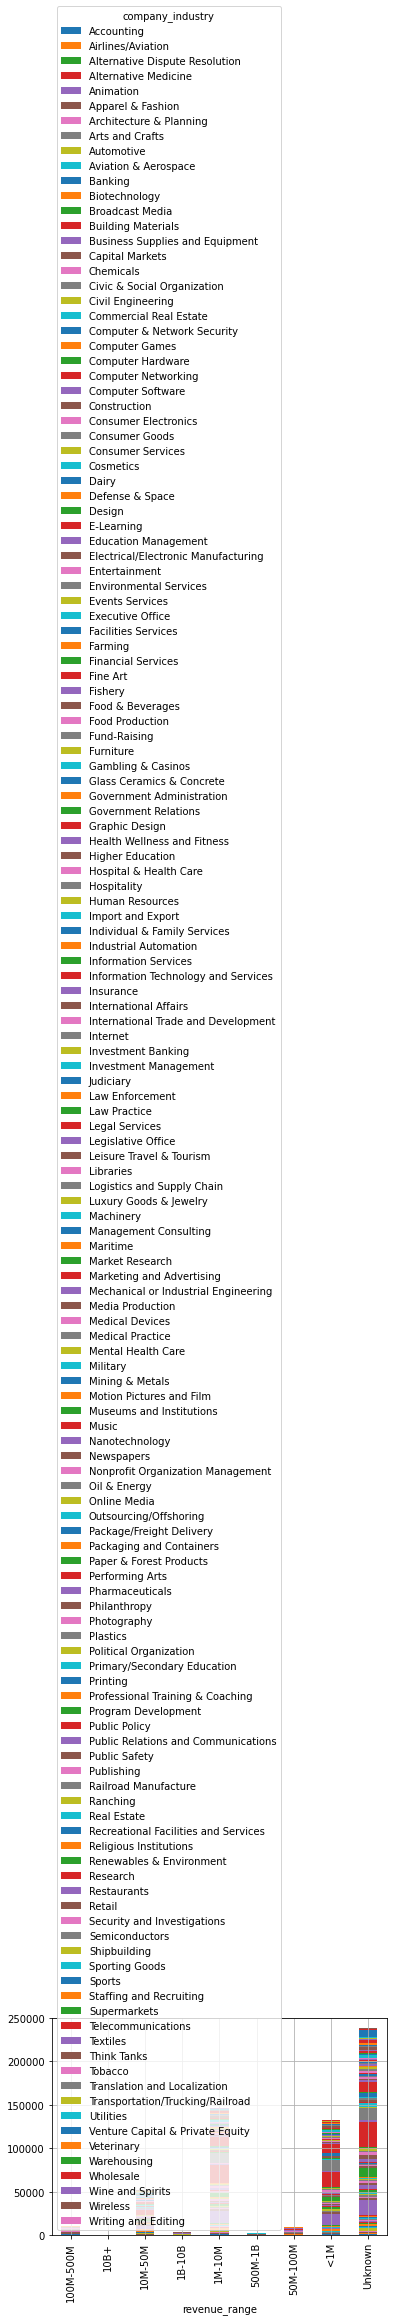

In [51]:
get_cat_cat_graph(data,"revenue_range","company_industry",10,10)

<AxesSubplot:title={'center':'Correlation Matrix'}>

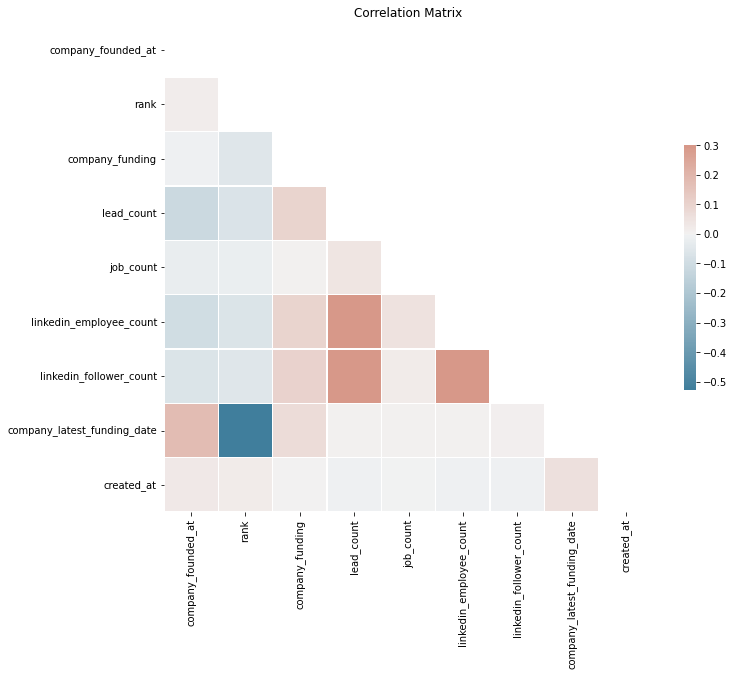

In [52]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Matrix')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation plot do not show high correlation +ve, however we can see high -ve correlation in `rank` and `company_latest_funding_date`

In [53]:
data.head()

,company_city,company_country,company_state,company_name,company_products_services,company_industry,company_size,company_type,company_founded_at,company_continent,...,company_funding,lead_count,job_count,cb_id,linkedin_employee_count,linkedin_follower_count,company_description,company_latest_funding_date,created_at,company_sector
0,San Francisco,United States,California,ProLeads io,"[Personalization, Sales Development, Sales Com...",Information Technology and Services,1-10,Private,2012.0,North America,...,75000.0,1,0,0c3d85ec-95fa-4ca9-93c3-a0a36f0feed1,2.0,97.0,ProLeads is The Holy Grail of Account Based Pr...,1.483661e+09,1527198098,Technology
1,Madrid,Spain,Madrid,cramway,[e-learning Herramienta colaborativa],E-Learning,1-10,Private,2013.0,Europe,...,NaN,0,0,e036f6d6-400f-ee49-7c1c-ec0bacf0b36a,1.0,84.0,cramway | The collaborative e-learning\n\ncram...,NaN,1527199697,Technology
2,Sion,Switzerland,Valais,imperix,"[Power electronic systems, Advanced control ha...",Electrical/Electronic Manufacturing,11-50,Private,2013.0,Europe,...,NaN,8,0,b7dfccd0-6645-4a51-9a36-7a7120b20dd2,9.0,1174.0,Imperix is a Swiss company developing high-end...,NaN,1527200005,Industrials & Chemicals
3,Seoul,Korea Republic of,Seoul-t'ukpyolsi,Yonhap Infomax,NaN,Information Services,51-200,Private,NaN,Asia,...,0.0,128,0,7e3026c3-0e90-da95-5bd3-669d807a10e0,72.0,NaN,Yonhap Infomax is a financial news and data pr...,0.000000e+00,1547273431,Technology
4,New York,United States,New York,Saffron Fix,NaN,Food & Beverages,1-10,NaN,2014.0,North America,...,0.0,0,0,9c924dba-43ed-45e4-bb4f-4880db71eca1,NaN,NaN,Saffron Fix is the ONLY Indian meal-kit delive...,0.000000e+00,1547273431,Retail and CPG


In [54]:
print(data.columns)

Index(['company_city', 'company_country', 'company_state', 'company_name',
       'company_products_services', 'company_industry', 'company_size',
       'company_type', 'company_founded_at', 'company_continent',
       'company_address', 'revenue_range', 'rank', '_id', 'company_funding',
       'lead_count', 'job_count', 'cb_id', 'linkedin_employee_count',
       'linkedin_follower_count', 'company_description',
       'company_latest_funding_date', 'created_at', 'company_sector'],
      dtype='object')


In [55]:
# data.hist(figsize=(15,15))
# plt.show()

<AxesSubplot:title={'center':'company_industry'}>

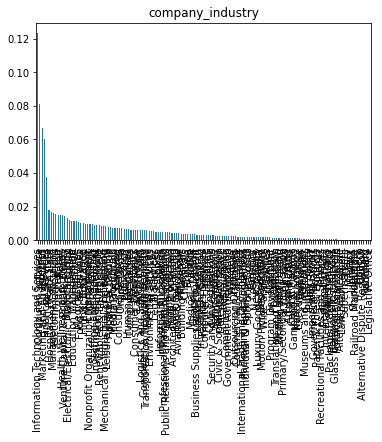

In [56]:
# sns.pairplot(data, hue='company_industry', height=2)
# data['company_industry'].value_counts(normalize=True)*100   # percentage wise
data['company_industry'].value_counts(normalize=True).plot.bar(title = "company_industry")

`IMBALANCE DATASET`

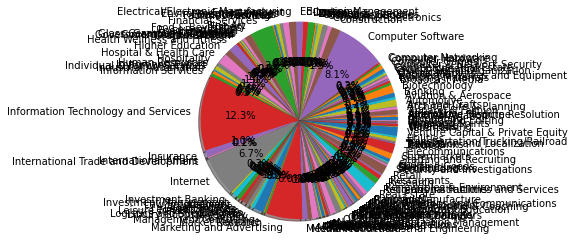

In [57]:
labels = data['company_industry'].astype('category').cat.categories.tolist()
counts = data['company_industry'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [58]:
# DEALING WITH IMBALANCE DATASET

In [ ]:
# DEALING WITH company_products_services

In [ ]:
data["company_products_services"][0]

In [ ]:
data["company_industry"][0]

In [ ]:
print(data["company_products_services"][10])
data["company_industry"][10]

In [ ]:
# best way is to give them as embedding
# [embedding1,embedding2....] ----> [PCA_combined]

# Now fill theese missing values with PCA_combined as variable and drop company_products_services

In [ ]:
ft.get_dimension()
fasttext.util.reduce_model(ft, 10)

In [ ]:

def get_embeddings(word_list, ft):
    embedding_list=[]
    for word in word_list:
        
        word = str(word)
        f = ft.get_word_vector(word)
        embedding_list.append(f)

    return embedding_list

In [ ]:
data['company_products_services_embeddings'] = data.apply(lambda x: get_embeddings(x["company_products_services"], ft), axis = 1)


### 4. Log Transformations-removing outliers/skewness

In [ ]:
# Make Transformation for required features to remove outlier and skewness

### 5. FEATURE ENGINEERING

In [ ]:
data.head()

In [ ]:
# feature from datetime

### 6. TEXT CLEANING/Pre-Processing

In [ ]:
data['company_description'] = data['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))

In [ ]:
data['company_description'] = data['company_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
data['company_description'] = data['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

In [ ]:
#removal of stopwords
data['company_description'] = data['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
#STEMMING
st = PorterStemmer()
data['company_description']=data['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))

In [ ]:
data['company_description'][0], data['company_description'][10], data['company_description'][100]